In [35]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline

## Model evaluators
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

## Models to be used
import xgboost as XGB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Text(0.5, 1.0, 'Comparsion betweeen Countries and Customers')

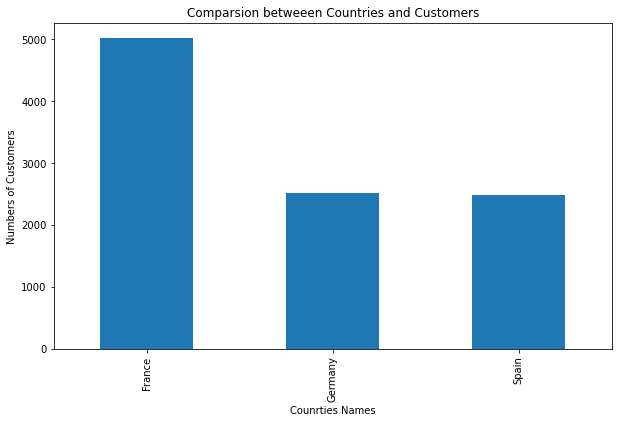

In [7]:
plt.figure(figsize=(10, 6))
df['Geography'].value_counts().plot(kind='bar')
plt.xlabel('Counrties Names')
plt.ylabel('Numbers of Customers')
plt.title('Comparsion betweeen Countries and Customers')

([], [])

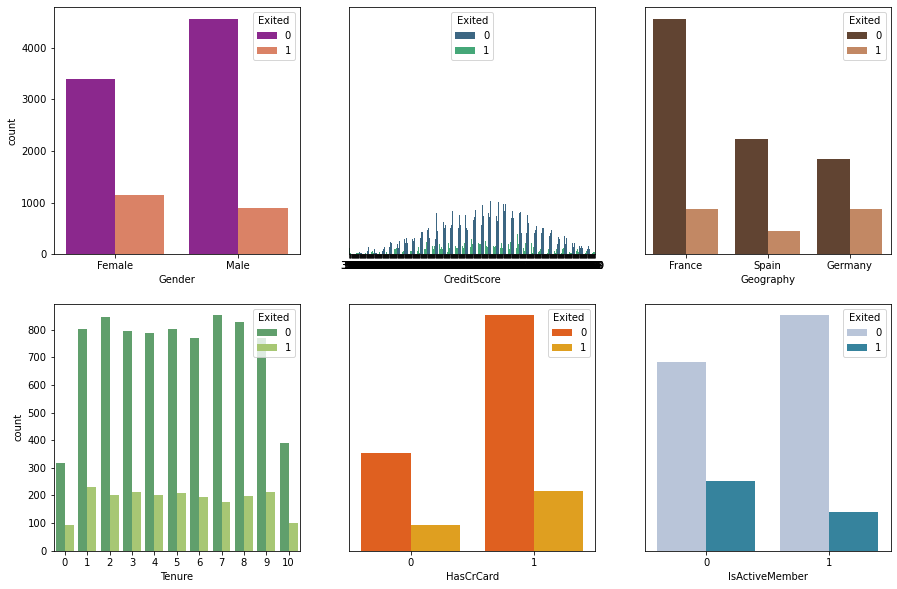

In [6]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(x='Gender' ,hue='Exited', data=df,palette='plasma')

plt.subplot(2,3,2)
sns.countplot(x='CreditScore',hue='Exited',data=df,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,3)
sns.countplot(x='Geography',hue='Exited',data=df,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.countplot(x='Tenure', data=df,hue='Exited',palette='summer')

plt.subplot(2,3,5)
sns.countplot(x='HasCrCard',hue='Exited',data=df,palette='autumn')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.countplot(x='IsActiveMember',data=df,hue='Exited',palette='PuBuGn')
plt.ylabel(' ')
plt.yticks([ ])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

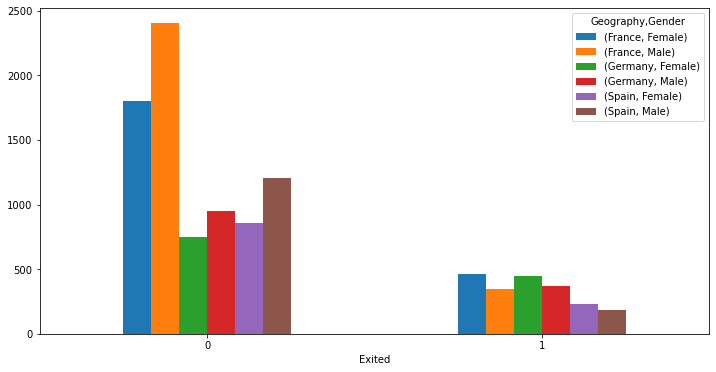

In [8]:
product_status= pd.crosstab(index=df['Exited'], columns=[df['Geography'],df['Gender']] )
product_status.plot(kind='bar',figsize=(12,6))
plt.xticks(rotation=360)

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Changing object datatypes to category datatype

In [10]:
df['Geography'] = pd.Categorical(df['Geography'])
car_type_categories = df['Geography'].cat.categories
df['Geography'] = df['Geography'].cat.codes+1

In [11]:
df['Gender'] = pd.Categorical(df['Gender'])
car_type_categories = df['Gender'].cat.categories
df['Gender'] = df['Gender'].cat.codes+1

In [12]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,3,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,3,1,43,2,125510.82,1,1,1,79084.10,0


## Model and Evaluation

In [14]:
x = df.drop(['Exited'], axis = 1)
y = df['Exited']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 42)

In [22]:
# fit scaler on training data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

# transform the testing data column
x_test = sc.transform(x_test)


In [23]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_lr = lr.predict(x_test)

In [24]:
lr.score(x_test, y_test)

0.815

In [25]:
cm = confusion_matrix(y_test, y_lr)
cm

array([[1559,   48],
       [ 322,   71]], dtype=int64)

In [26]:
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [27]:
rand = RandomForestClassifier(n_estimators=500)
rand.fit(x_train, y_train)
y_rand = rand.predict(x_test)

In [28]:
rand.score(x_test, y_test)

0.8675

In [29]:
cm = confusion_matrix(y_test, y_rand)
cm

array([[1553,   54],
       [ 211,  182]], dtype=int64)

In [30]:
print(classification_report(y_test, y_rand))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [31]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_dtree = dtree.predict(x_test)

In [32]:
dtree.score(x_test, y_test)

0.7855

In [33]:
cm = confusion_matrix(y_test, y_dtree)
cm

array([[1360,  247],
       [ 182,  211]], dtype=int64)

In [34]:
print(classification_report(y_test, y_dtree))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.54      0.50       393

    accuracy                           0.79      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000



In [36]:
xgb  = XGBClassifier(n_estimators=500)
xgb.fit(x_train, y_train)
y_xgb = xgb.predict(x_test)

In [37]:
xgb.score(x_test, y_test)

0.8525

In [38]:
cm = confusion_matrix(y_test, y_xgb)
cm

array([[1504,  103],
       [ 192,  201]], dtype=int64)

In [39]:
print(classification_report(y_test, y_xgb))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.66      0.51      0.58       393

    accuracy                           0.85      2000
   macro avg       0.77      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000



In [40]:
import math
math.sqrt(len(y_test))

44.721359549995796

In [43]:
knn=KNeighborsClassifier(n_neighbors=43)
knn.fit(x_train, y_train)
knn_prediction=knn.predict(x_test)

In [44]:
knn.score(x_test, y_test)

0.8365

In [45]:
cm = confusion_matrix(y_test, knn_prediction)
cm

array([[1591,   16],
       [ 311,   82]], dtype=int64)

In [46]:
print(classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1607
           1       0.84      0.21      0.33       393

    accuracy                           0.84      2000
   macro avg       0.84      0.60      0.62      2000
weighted avg       0.84      0.84      0.79      2000

